# uppercase #

Hypothese: Die Nutzung von Wörtern, die komplett groß geschrieben werden hat einfluss auf die Fehlerrate, da das Model diesen Wörtern eine negative Konnutation zuschreibt.

Grund: Statische Analyse
TODO: BSP

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagramm_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [2]:
def uppercaseAverageWord(tokens):
    return uppercaseWords(tokens) / len(tokens) * 100
def uppercaseWords(tokens):
    counter = 0
    for word in tokens:
        if word.isupper():
            counter += 1;
    return counter
def lowercaseAverageWord(tokens):
    return lowercaseWords(tokens) / len(tokens) * 100
def lowercaseWords(tokens):
    counter = 0
    for word in tokens:
        if word.islower():
            counter += 1;
    return counter
def generate_filter(fr, to, filterFunction):
    def f(element):
        ld = filterFunction(element['tokens'])
        if ld >= fr and ld < to:
            return True
        return False
    return f

def addFilterInterval(filterList, start, stop, step, func):
    for i in range(start, stop, step):
        filterList.append(('%s-%s' % (i, i+step-1),generate_filter(i, i+step, func)))

# for t in data:
#     print(lowercaseWords(t['tokens']))
# print(pfilters)

In [3]:
uppercaseFilters = []
# uppercaseFilters.append(('all',generate_filter(0, 2000, uppercaseWords)))
# addFilterInterval(uppercaseFilters, 0, 10, 1, uppercaseWords)
step = 1
for i in range(1, 7, step):
    uppercaseFilters.append(('%s-%s' % (i, i+step),generate_filter(i, i+step, uppercaseWords)))

#name, filters, relative
print('uppercase word count')
createPlt(name = "Test1 absolute", filters = uppercaseFilters, relative = False)
createPlt(name = "Test1 relative", filters = uppercaseFilters, relative = True)
print('All')
showMetrics(calcMetrics(generate_filter(0, 2000, uppercaseWords)))
print('1-4')
showMetrics(calcMetrics(generate_filter(1, 4, uppercaseWords)))
print('Verbesserung 1-4')
showMetrics(calcMetricDifference(calcMetrics(generate_filter(1, 4, uppercaseWords))))

uppercase word count


AttributeError: 'spacy.tokens.token.Token' object has no attribute 'isupper'

uppercase word count


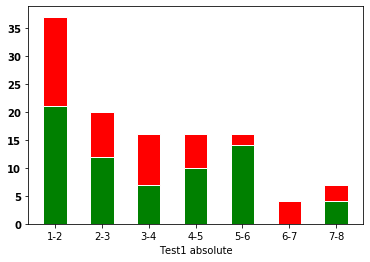

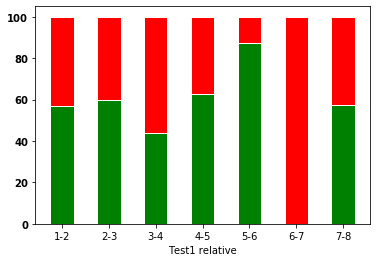

All


all labels (670),positiv (245),negative (425)


,true (452),false (218)
positiv (287),157,130
negativ (383),295,88


accuracy,precision,recall,f1Score
0.6746268656716418,0.5470383275261324,0.6408163265306123,0.5902255639097745


1-4


all labels (73),positiv (32),negative (41)


,true (40),false (33)
positiv (43),21,22
negativ (30),19,11


accuracy,precision,recall,f1Score
0.547945205479452,0.4883720930232558,0.65625,0.5599999999999999


In [205]:
uppercaseAverageFilters = []
# uppercaseAverageFilters.append(('all',generate_filter(0, 2000, uppercaseAverageWord)))
# addFilterInterval(uppercaseAverageFilters, 0, 10, 1, uppercaseAverageWord)
step = 1
for i in range(1, 8, step):
    uppercaseAverageFilters.append(('%s-%s' % (i, i+step),generate_filter(i, i+step, uppercaseAverageWord)))

#name, filters, relative
print('uppercase word count')
createPlt(name = "Test1 absolute", filters = uppercaseAverageFilters, relative = False)
createPlt(name = "Test1 relative", filters = uppercaseAverageFilters, relative = True)
print('All')
showMetrics(calcMetrics(generate_filter(0, 2000, uppercaseAverageWord)))
print('1-4')
showMetrics(calcMetrics(generate_filter(1, 4, uppercaseAverageWord)))
print('Verbesserung 1-4')
showMetrics(calcMetricDifference(calcMetrics(generate_filter(1, 4, uppercaseWords))))